In [11]:
import supervision as sv
import cv2
import numpy as np
import os
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [4]:
test_sequence =  load_images_from_folder('C:/Studie/BEP/Data/Soccernet_tracking_data/calibration-2023/train')

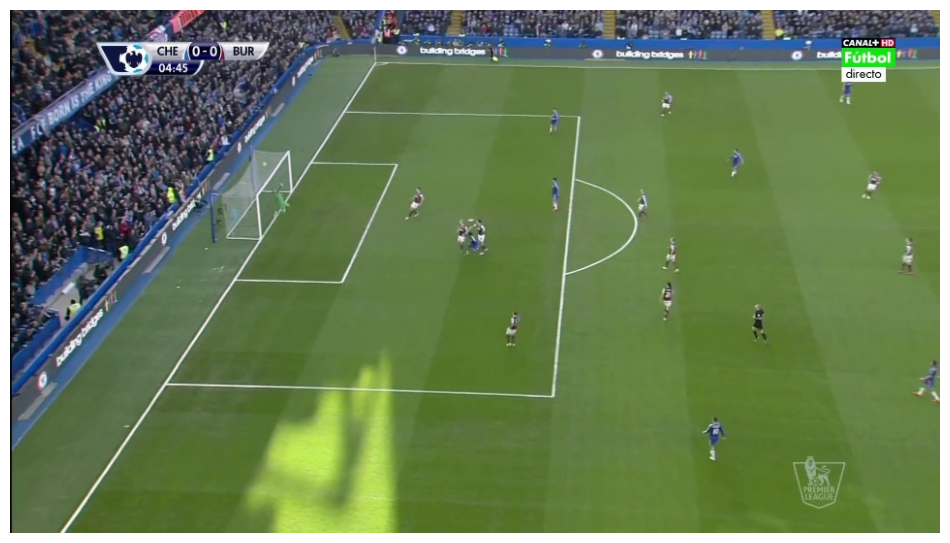

In [6]:
sv.plot_image(test_sequence[1])

In [16]:
def draw_lines_on_loaded_image(loaded_image, json_path):
    # Get the dimensions of the loaded image
    height, width = loaded_image.shape[:2]

    # Create a blank image to draw lines (copy of the original image)
    canvas = loaded_image.copy()

    # Load the annotations (line coordinates) from the JSON file
    with open(json_path, 'r') as json_file:
        annotations = json.load(json_file)

    # Draw each set of lines from the JSON annotations
    for line_name, points in annotations.items():
        # Extract x and y coordinates, rescale them to image dimensions
        line_coords = [(int(p['x'] * width), int(p['y'] * height)) for p in points]

        # Draw the lines on the image
        for i in range(len(line_coords) - 1):
            start_point = line_coords[i]
            end_point = line_coords[i + 1]
            # Drawing line using matplotlib (in RGB format)
            plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 'g-', linewidth=2)


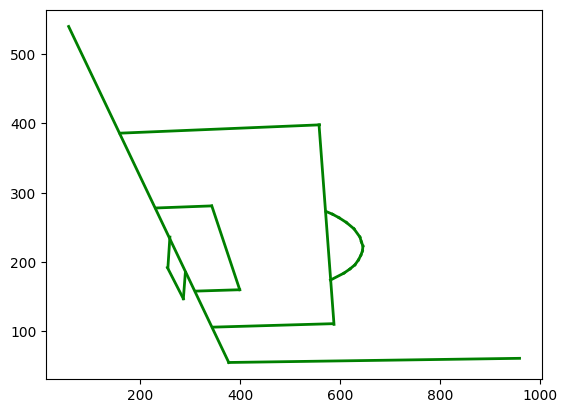

In [17]:
test_img = draw_lines_on_loaded_image(test_sequence[1], 'C:/Studie/BEP/Data/Soccernet_tracking_data/calibration-2023/train/00001.json')

In [15]:
sv.plot_image(test_img)

AttributeError: 'NoneType' object has no attribute 'ndim'

<Figure size 1200x1200 with 0 Axes>